# "Description" Field Text Preparation

As mentioned in the previous notebook, our dataset consist of two columns: wine review "Description" (which is our predictor variable) and target variable grape "Variety". Our goal is to build a model which will predict the "variety" based on a review (provided as a natural language text in English), written by a professional wine connoisseur.

To make our task viable, we need to prepare the review texts in order to be able to fit the data to our selected classifier.

We're going to:
* lower case the text and tokenize it,
* remove English stop-words along with punctuation,
* stem the word-tokens,
* and finally vectorize the review text

Those techniques allow us to do the prediction.

In [36]:
import pandas as pd
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist
from matplotlib.pyplot import figure



In [3]:
# Let's read the previously prepared dataset
FILE_PATH = './data/pickles/01_prepared_dataset.pkl'
data = pd.read_pickle(FILE_PATH)
data.head()

,description,variety
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir
3,This re-named vineyard was formerly bottled as...,Pinot Noir
4,The producer sources from two blocks of the vi...,Pinot Noir


## Functions to process the "Description" field

In [5]:
# Let's prepare functions to process the text in the "Description" field


# We are going to use Regular Expression tokenizer, as we've noticed numbers with % next to the number.
# The percentage numbers might suggest some special proportion in wine's recipe. We are going to use this information to our advantage.
def tokenize_text(text):
    tokenizer = RegexpTokenizer('\d+%|\w+')
    token_list = list(map(str.lower, tokenizer.tokenize(text)))
    return token_list
    
# There are quite a few different stemmers available in nltk package. We will use English stemmer. 
# Other stemmers were tested in the "sandbox" notebook and the results are put there for reference.
def stem_tokens(token_list):
    stemmer = EnglishStemmer()
    res = " ".join([stemmer.stem(token) for token in token_list])
    return res

# Stopwords were extended with standard punctuation available from string package. 
# Additionally a customized list of stopwords was added.
def remove_stopwords(token_list):
    STOPWORDS = stopwords.words('english') + list(string.punctuation) + ['--', '."', 'would', 'since', '!"', '?"', ',"', '...', '..', 'u', "'s", '....', "n't", "'m"]
    content = [token for token in token_list if token not in STOPWORDS]
    return content

    

    
    

In [19]:
data['desc_clean'] = data['description'].apply(tokenize_text).apply(remove_stopwords).apply(stem_tokens)

In [20]:
data

,description,variety,desc_clean
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon,tremend 100% variet wine hail oakvill age thre...
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc,mac watson honor memori wine made mother treme...
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir,spent 20 month 30% new french oak incorpor fru...
3,This re-named vineyard was formerly bottled as...,Pinot Noir,name vineyard former bottl delancellotti find ...
4,The producer sources from two blocks of the vi...,Pinot Noir,produc sourc two block vineyard wine one high ...
...,...,...,...
64728,"This needs a good bit of breathing time, then ...",Pinot Noir,need good bit breath time begin reveal cherri ...
64729,The nose is dominated by the attractive scents...,Pinot Noir,nose domin attract scent new french oak hint p...
64730,"Decades ago, Beringer’s then-winemaker Myron N...",White Blend,decad ago bering winemak myron nightingal crea...
64731,Many people feel Fiano represents southern Ita...,White Blend,mani peopl feel fiano repres southern itali pr...


## Word frequency

In [41]:
# Let's check the frequency of most common words in the description. 
# Perhaps we might get rid some of them if we find them not useful for our prediction.

all_token_lists = []
for desc in data.desc_clean:
    token_list = desc.split(' ')
    all_token_lists.extend(token_list)
      

In [42]:
most_frequent_words = FreqDist(all_token_lists)

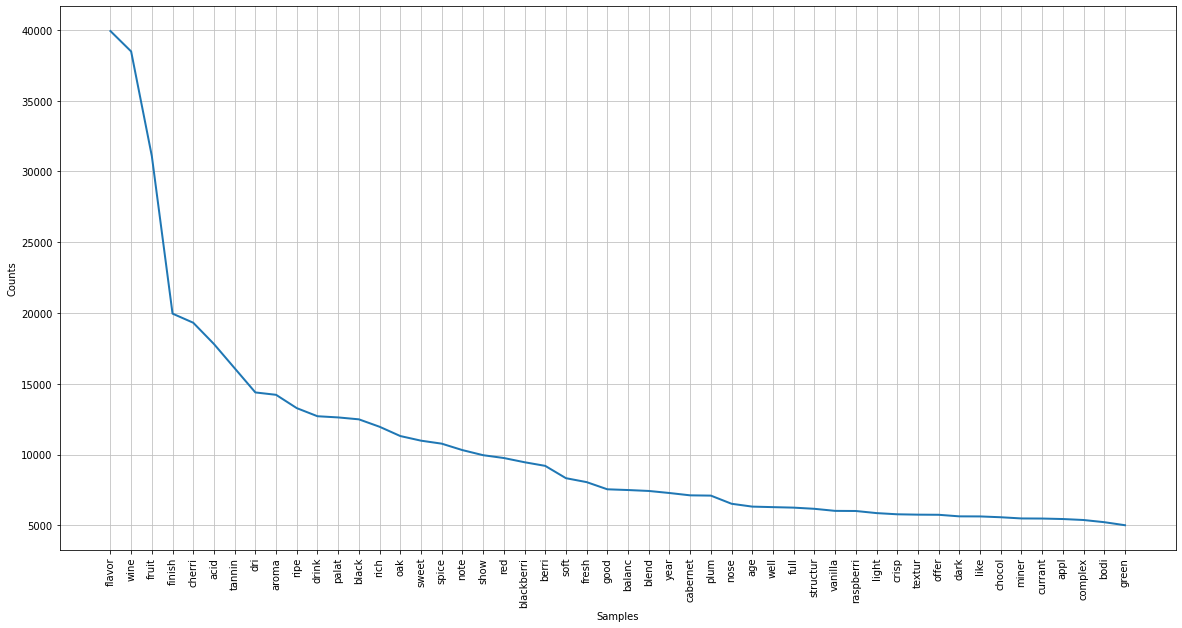

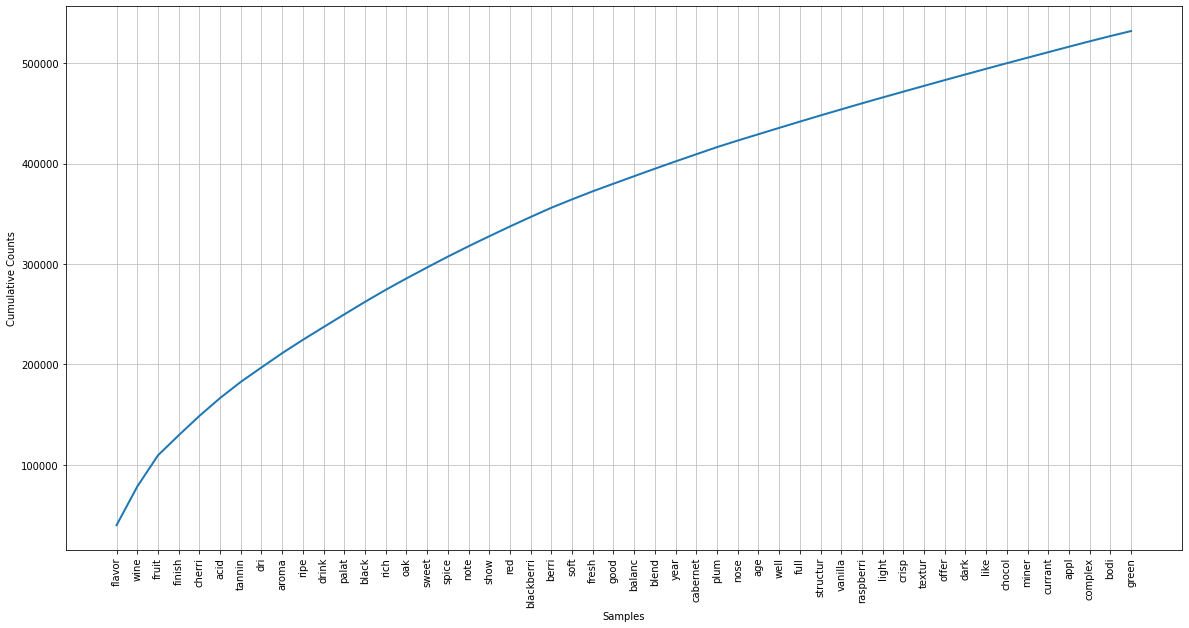

In [43]:
figure(figsize=(20,10))

most_frequent_words.plot(50, cumulative=False)

figure(figsize=(20,10))
most_frequent_words.plot(50, cumulative=True)

In [45]:
most_frequent_words.most_common(10)

[('flavor', 39916),
 ('wine', 38475),
 ('fruit', 31082),
 ('finish', 19955),
 ('cherri', 19311),
 ('acid', 17807),
 ('tannin', 16097),
 ('dri', 14388),
 ('aroma', 14220),
 ('ripe', 13279)]

It looks like 3 first words (tokens): "flavor", "wine", and "fruit" are quite common and they frequently show up in the review texts. Let's check what's their percentage of usage across all words.

In [51]:
total_words = len(all_token_lists)
for token in most_frequent_words.most_common(10):
    word, freq = token
    print(f'{word.upper()} is {round(freq / total_words * 100, 2)}% of total words in reviews' )
    

FLAVOR is 2.46% of total words in reviews
WINE is 2.37% of total words in reviews
FRUIT is 1.91% of total words in reviews
FINISH is 1.23% of total words in reviews
CHERRI is 1.19% of total words in reviews
ACID is 1.1% of total words in reviews
TANNIN is 0.99% of total words in reviews
DRI is 0.89% of total words in reviews
AROMA is 0.88% of total words in reviews
RIPE is 0.82% of total words in reviews


Although those 3 words are very common they not drastically outweigh other words. Let's keep them for now.

In [52]:
# Let's pickle the dataset for the next step

PICKLE_PATH = './data/pickles/02_tokenized_descriptions.pkl'
data.to_pickle(PICKLE_PATH)